In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C://Users//NANDANA//Claims//data//fake_data.csv")

In [3]:
print(df.head())

  Claim_Number  Excess                        Circumstance  \
0    CLM100491   72.52            Third Party opening door   
1    CLM101500  713.43      Insured Vehicle changing lanes   
2    CLM100864   62.86             Third Party Hit Insured   
3    CLM101947  920.39  Third Party Vehicle changing lanes   
4    CLM100138  852.00            Third Party opening door   

  OrganizationNotifiedBy MethodofNotification NCD_Indicator  \
0               Employee                Email            No   
1               Employee                Email            No   
2                     TP                Phone           Yes   
3            Nameddriver                Phone            No   
4                 Broker                Phone           Yes   

   Notification_Delay  Injury  ThirdPartyVehicleDamage  InsuredVehicleDamage  \
0               183.0       0                        1                     1   
1               271.0       0                        1                     1   
2       

In [4]:
print("Dim :", df.shape)

Dim : (3800, 13)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_Number             3800 non-null   object 
 1   Excess                   3800 non-null   float64
 2   Circumstance             3800 non-null   object 
 3   OrganizationNotifiedBy   3800 non-null   object 
 4   MethodofNotification     3800 non-null   object 
 5   NCD_Indicator            3800 non-null   object 
 6   Notification_Delay       3685 non-null   float64
 7   Injury                   3800 non-null   int64  
 8   ThirdPartyVehicleDamage  3800 non-null   int64  
 9   InsuredVehicleDamage     3800 non-null   int64  
 10  Insured_age              3800 non-null   int64  
 11  EstimatedVehicleValue    3726 non-null   float64
 12  Liability_group          3800 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 386.1+ KB
None


In [6]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [7]:
print("Column Names:", df.columns.tolist())

Column Names: ['Claim_Number', 'Excess', 'Circumstance', 'OrganizationNotifiedBy', 'MethodofNotification', 'NCD_Indicator', 'Notification_Delay', 'Injury', 'ThirdPartyVehicleDamage', 'InsuredVehicleDamage', 'Insured_age', 'EstimatedVehicleValue', 'Liability_group']


In [8]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Claim_Number                 0
Excess                       0
Circumstance                 0
OrganizationNotifiedBy       0
MethodofNotification         0
NCD_Indicator                0
Notification_Delay         115
Injury                       0
ThirdPartyVehicleDamage      0
InsuredVehicleDamage         0
Insured_age                  0
EstimatedVehicleValue       74
Liability_group              0
dtype: int64


In [9]:
print(df.describe().T)

                          count          mean           std      min      25%  \
Excess                   3800.0    815.556621   1296.039322     0.26   210.69   
Notification_Delay       3685.0     62.592130     87.296265     0.00    15.00   
Injury                   3800.0      0.453684      0.497916     0.00     0.00   
ThirdPartyVehicleDamage  3800.0      0.662895      0.472783     0.00     0.00   
InsuredVehicleDamage     3800.0      0.915789      0.277740     0.00     1.00   
Insured_age              3800.0     35.016842     11.209519    18.00    26.00   
EstimatedVehicleValue    3726.0  17921.272678  14878.520618  1944.00  9499.50   

                               50%         75%       max  
Excess                     499.315   1035.7625   20000.0  
Notification_Delay          30.000     46.0000     349.0  
Injury                       0.000      1.0000       1.0  
ThirdPartyVehicleDamage      1.000      1.0000       1.0  
InsuredVehicleDamage         1.000      1.0000       1.0

In [10]:
id_cols = ['Claim_Number']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categ_cols = df.select_dtypes(include=['object']).columns.tolist()

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [12]:
print(df.isnull().sum())

Claim_Number               0
Excess                     0
Circumstance               0
OrganizationNotifiedBy     0
MethodofNotification       0
NCD_Indicator              0
Notification_Delay         0
Injury                     0
ThirdPartyVehicleDamage    0
InsuredVehicleDamage       0
Insured_age                0
EstimatedVehicleValue      0
Liability_group            0
dtype: int64


In [13]:
categ_cols = [col
    for col in categ_cols
    if col not in id_cols]
bin_cols = [col for col in num_cols if df[col].nunique (dropna=False)==2]
categ_cols.extend(bin_cols)
num_cols = [col for col in num_cols if col not in bin_cols]

In [14]:
print("Numerical columns : ", num_cols)

Numerical columns :  ['Excess', 'Notification_Delay', 'Insured_age', 'EstimatedVehicleValue']


In [15]:
print("Categorical columns : ", categ_cols)

Categorical columns :  ['Circumstance', 'OrganizationNotifiedBy', 'MethodofNotification', 'NCD_Indicator', 'Liability_group', 'Injury', 'ThirdPartyVehicleDamage', 'InsuredVehicleDamage']


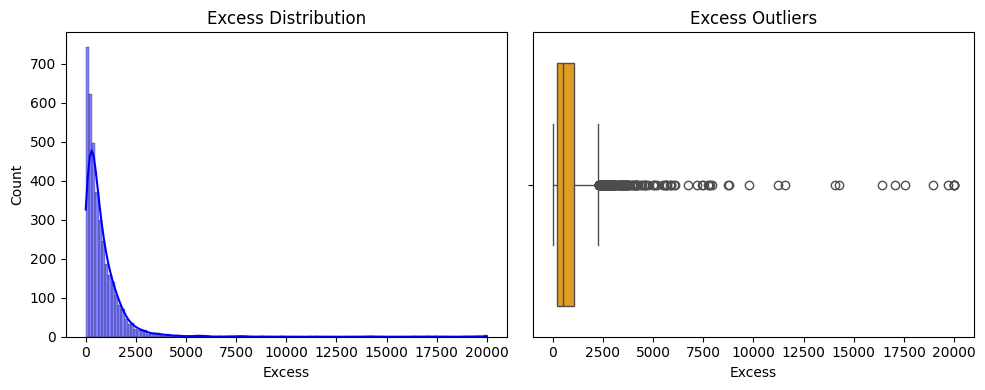

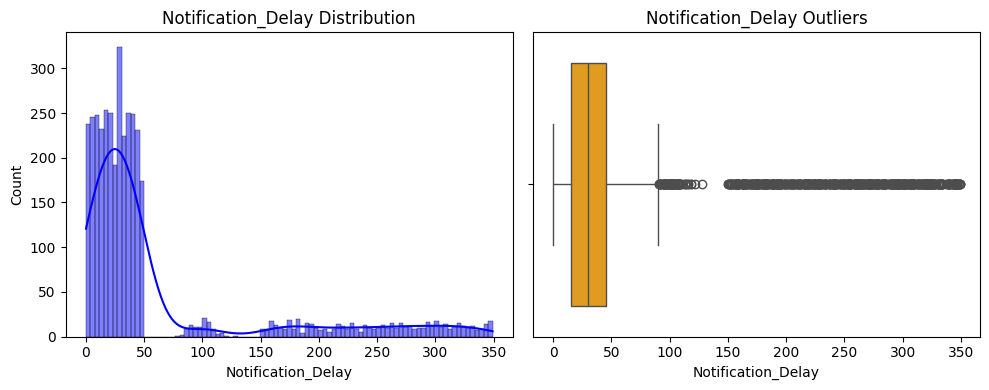

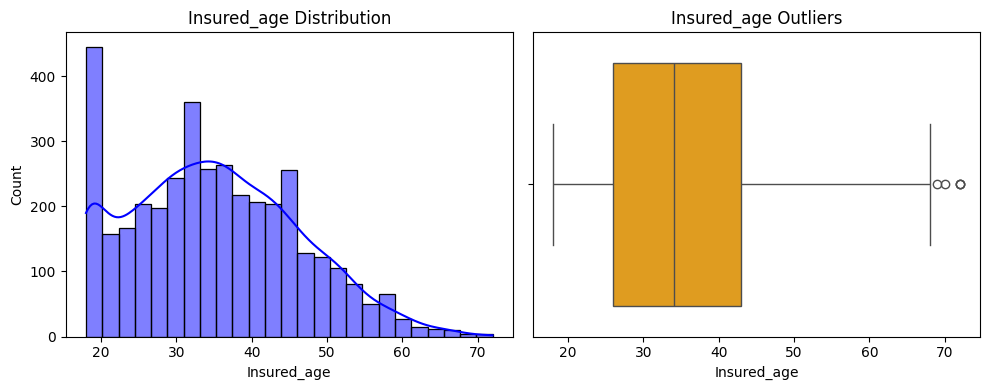

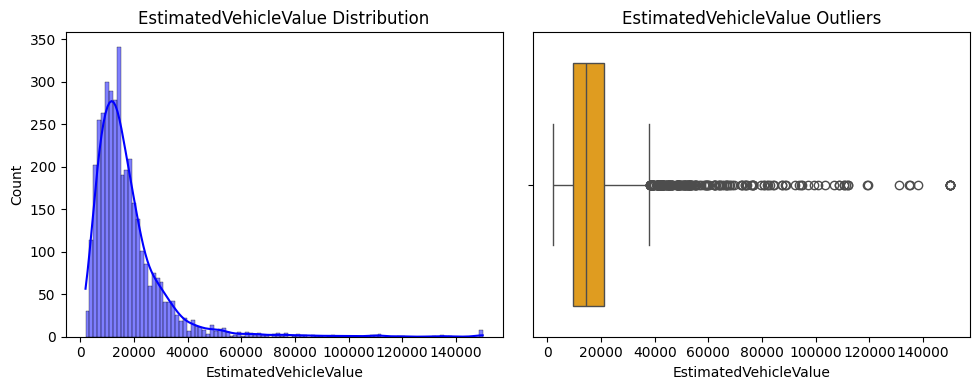

In [16]:
for col in num_cols:
    plt. figure(figsize=(10,4))
    plt. subplot (1,2,1)
    sns.histplot(df[col], kde=True, color="blue")
    plt. title(f"{col} Distribution")
    plt. subplot (1,2,2)
    sns.boxplot(x=df[col], color="orange")
    plt. title(f"{col} Outliers")
    plt. tight_layout()
    plt. show()

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


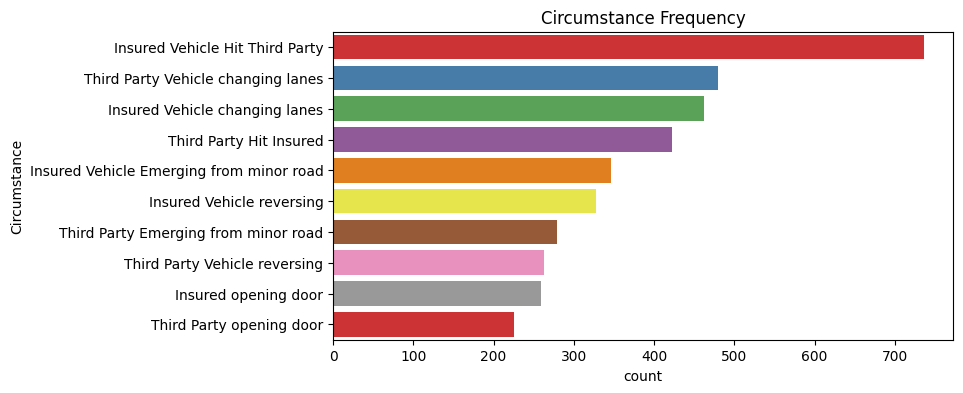

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


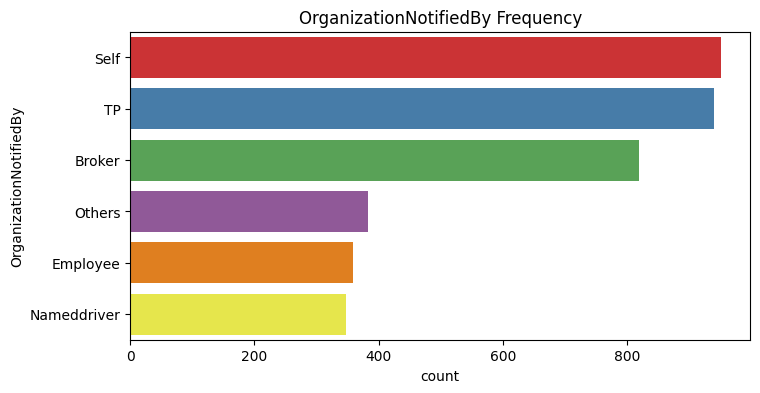

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


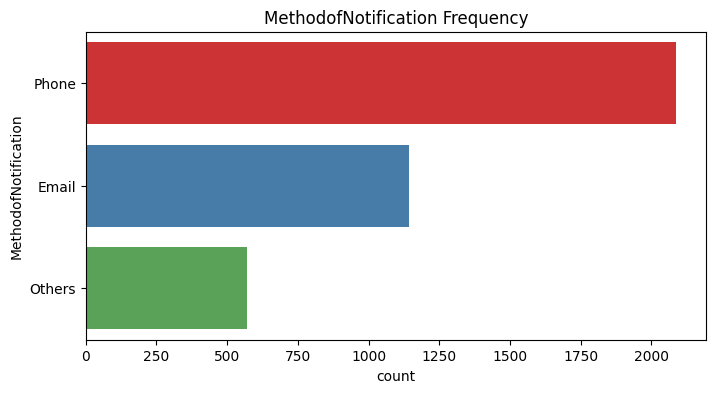

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


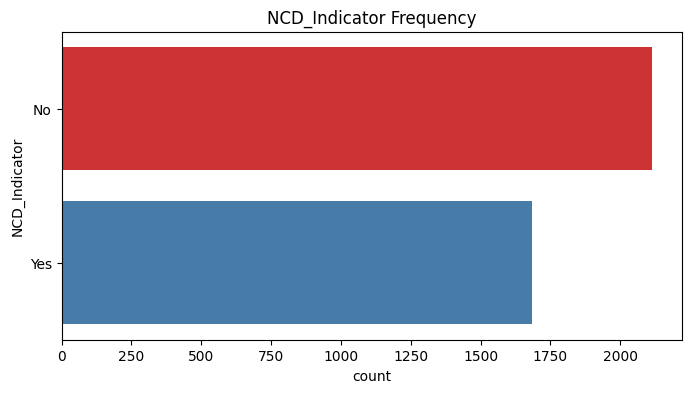

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


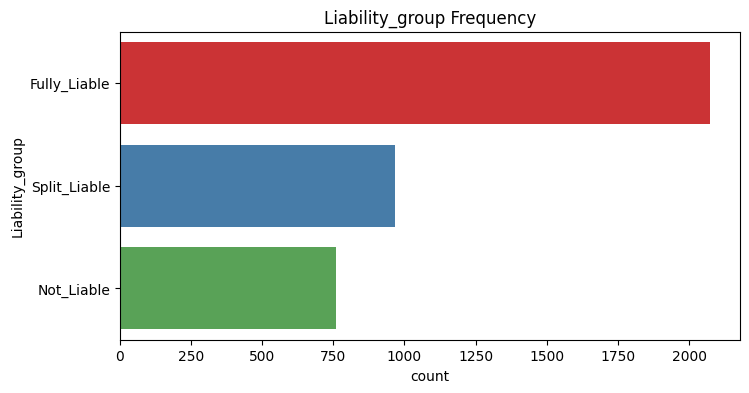

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


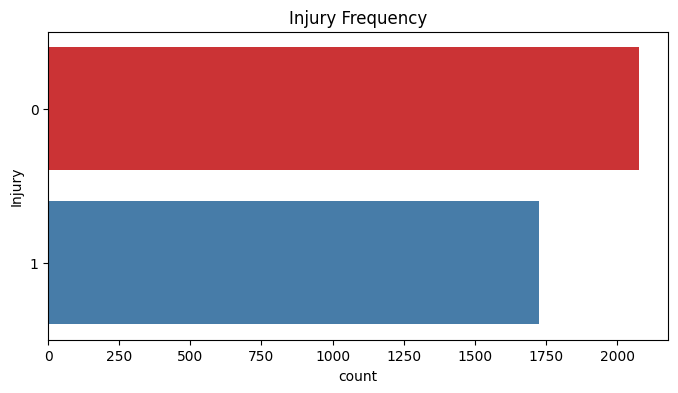

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


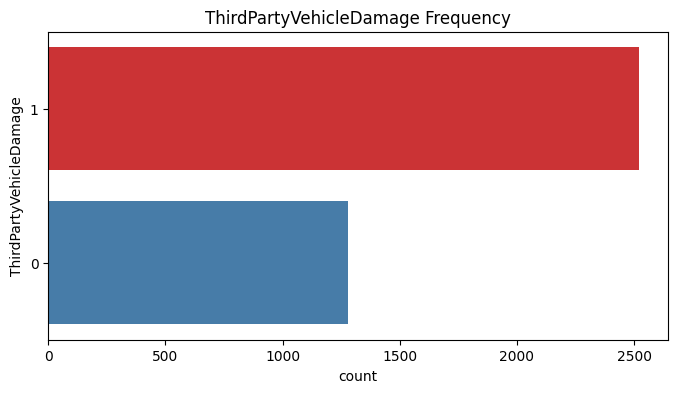

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\2032755755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


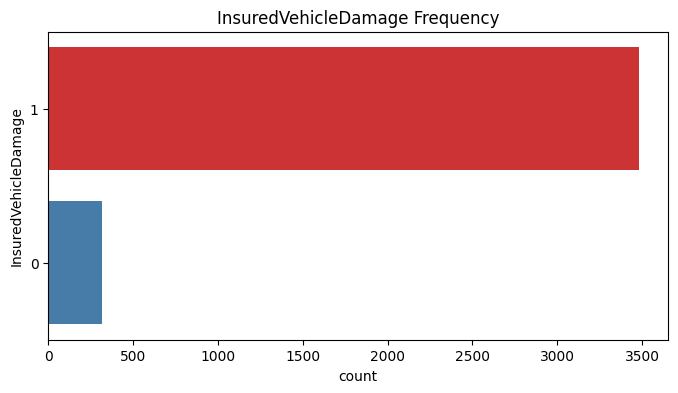

In [17]:
for col in categ_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(
        y=col, 
        data=df, 
        order=df[col].value_counts().index,
        palette="Set1"  
    )
    plt.title(f"{col} Frequency")
    plt.show()

In [18]:
target = "Liability_group"

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\4028866204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set3")


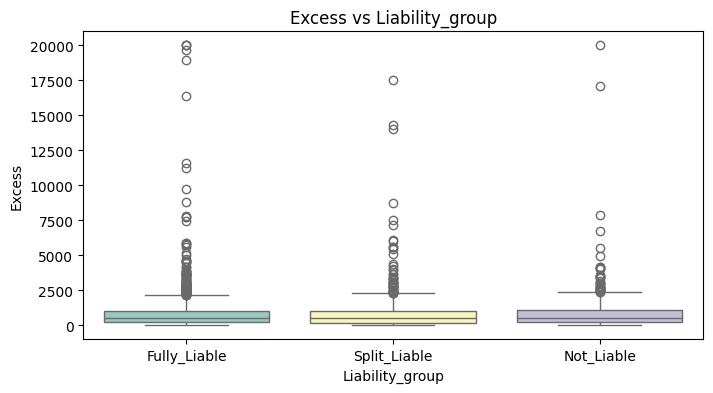

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\4028866204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set3")


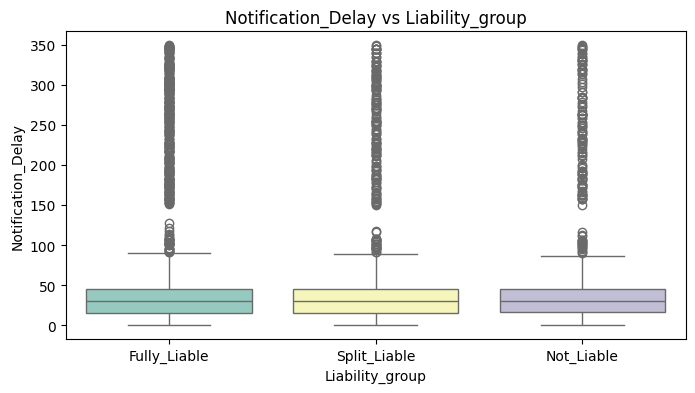

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\4028866204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set3")


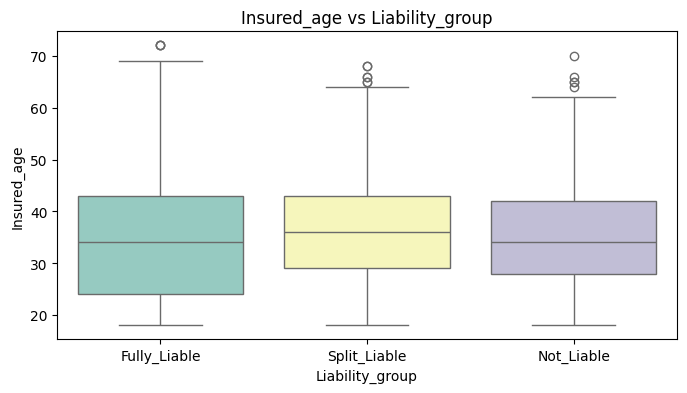

C:\Users\NANDANA\AppData\Local\Temp\ipykernel_15648\4028866204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette="Set3")


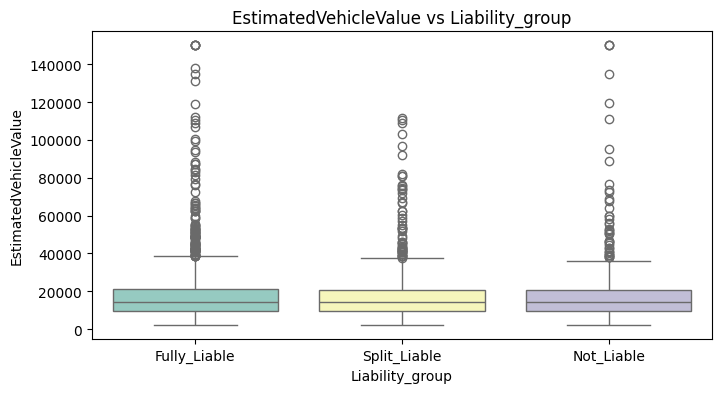

In [19]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=target, y=col, data=df, palette="Set3")
    plt.title(f"{col} vs {target}")
    plt.show()

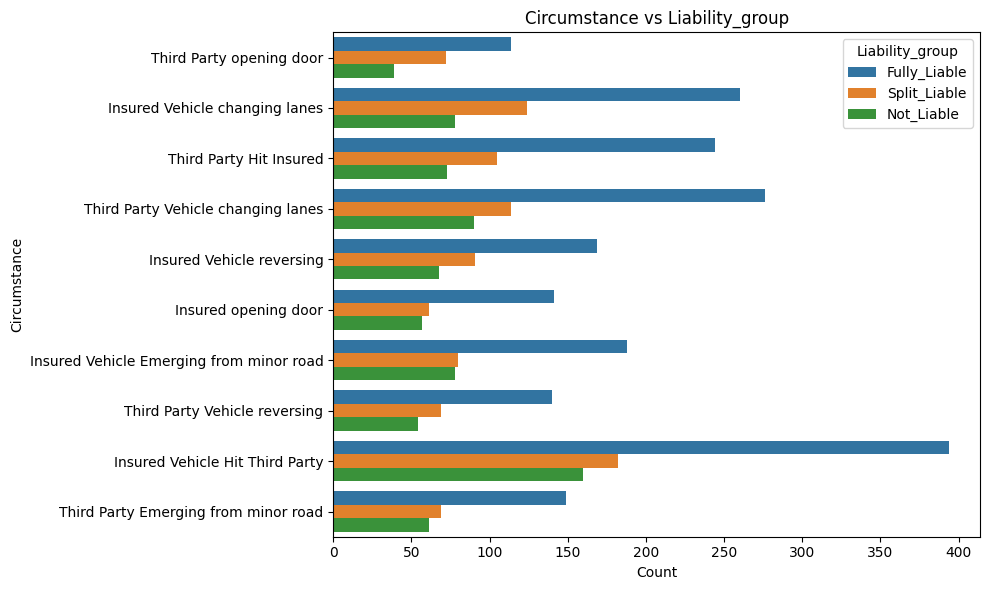

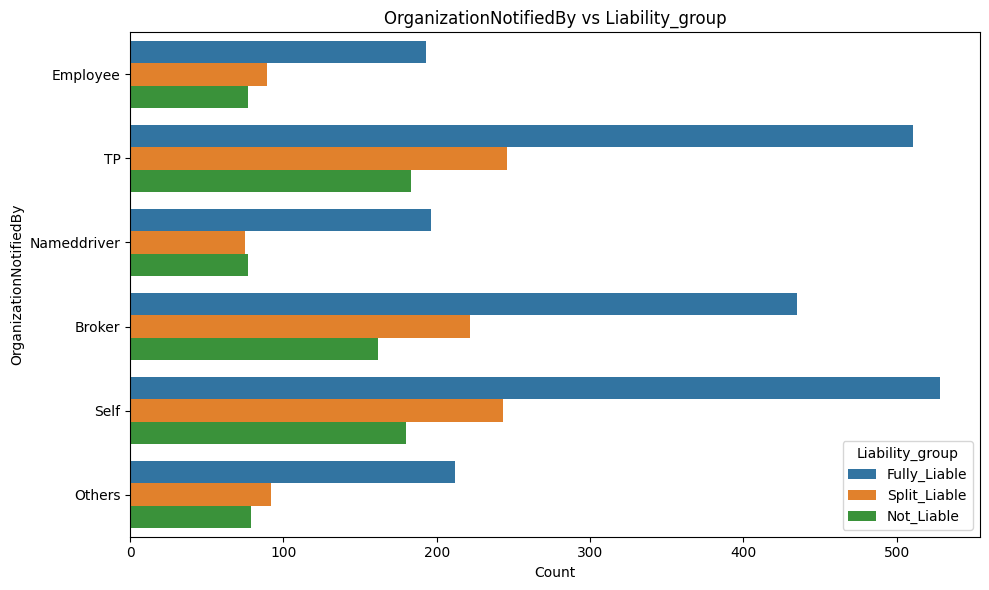

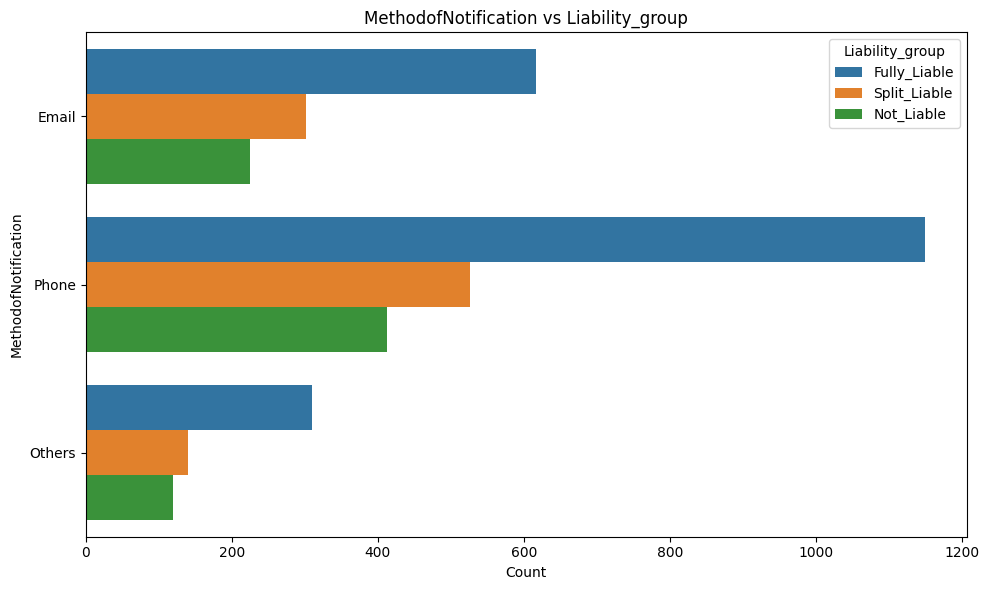

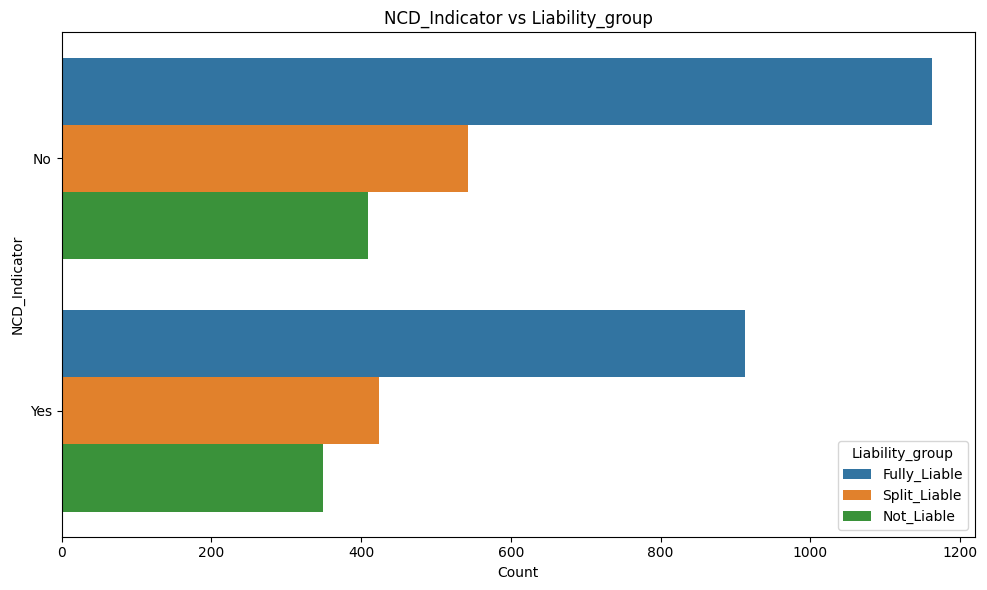

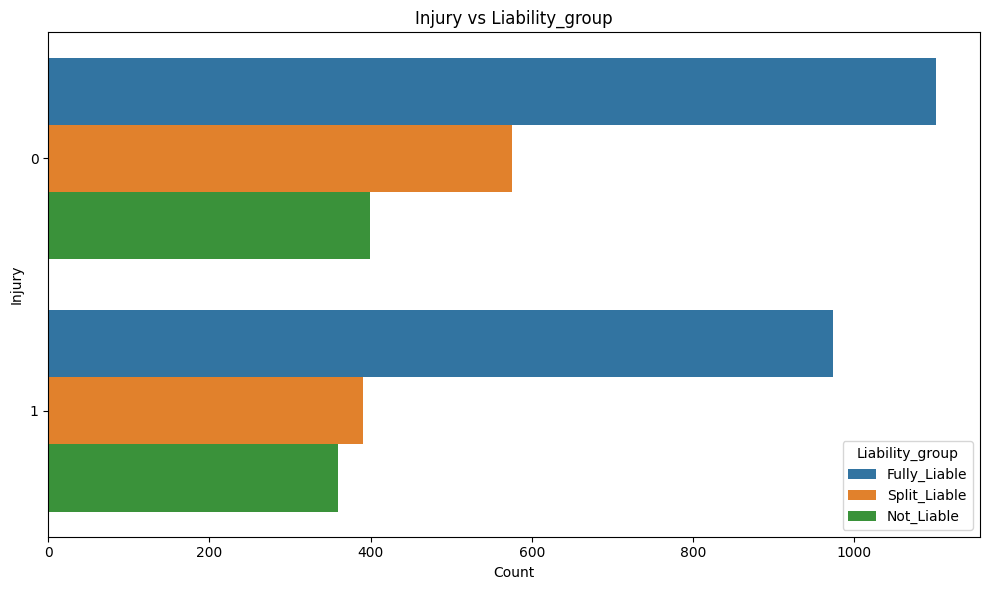

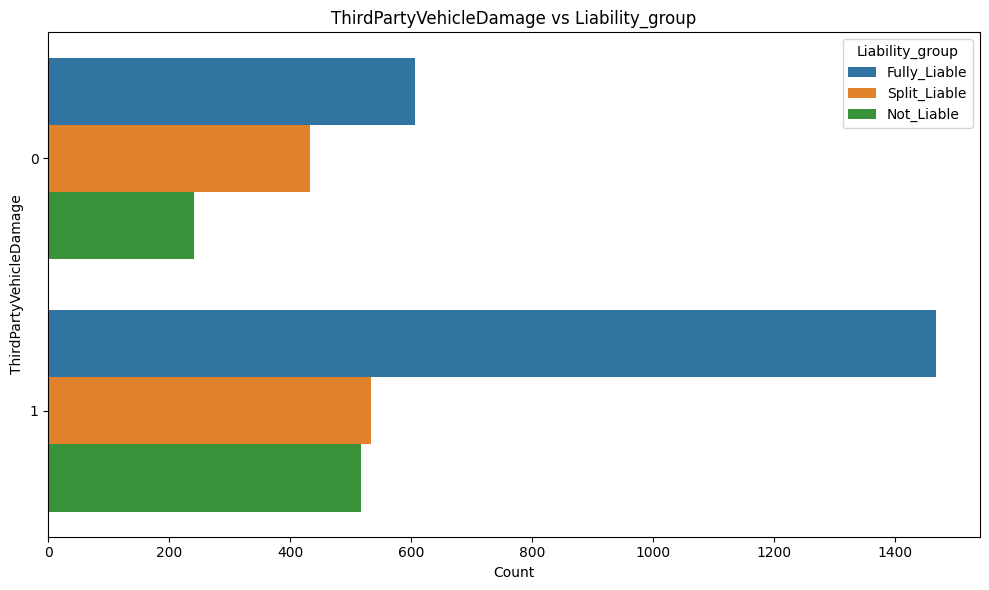

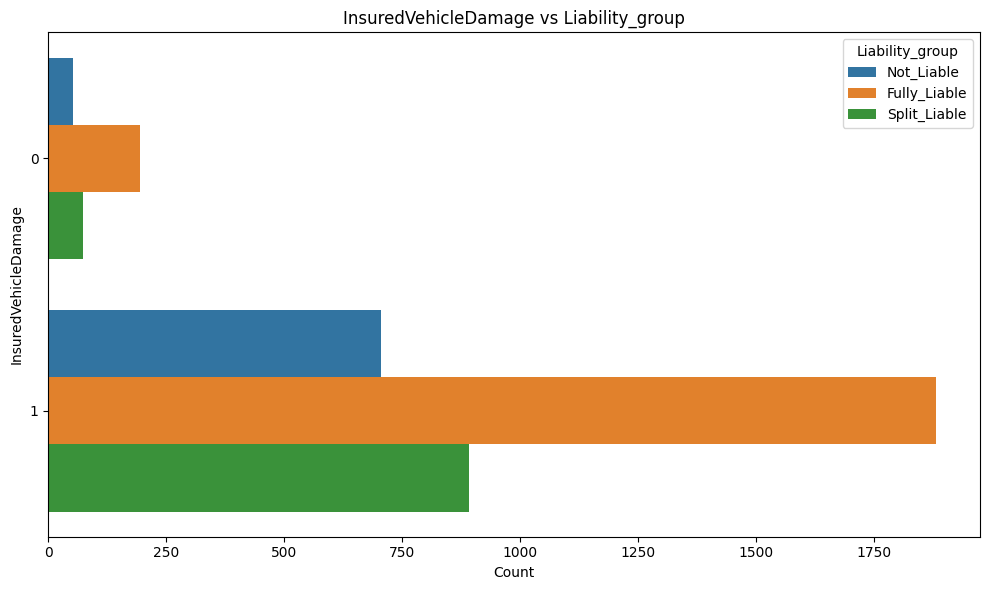

In [20]:
for col in categ_cols:
    if col != target:
        plt.figure(figsize=(10,6))
        sns.countplot(y=col, hue=target, data=df)
        plt.title(f"{col} vs {target}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


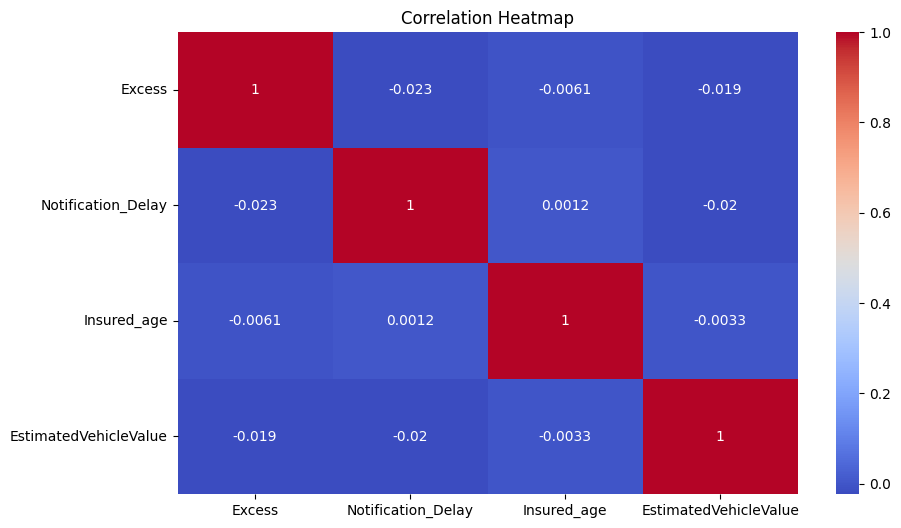

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

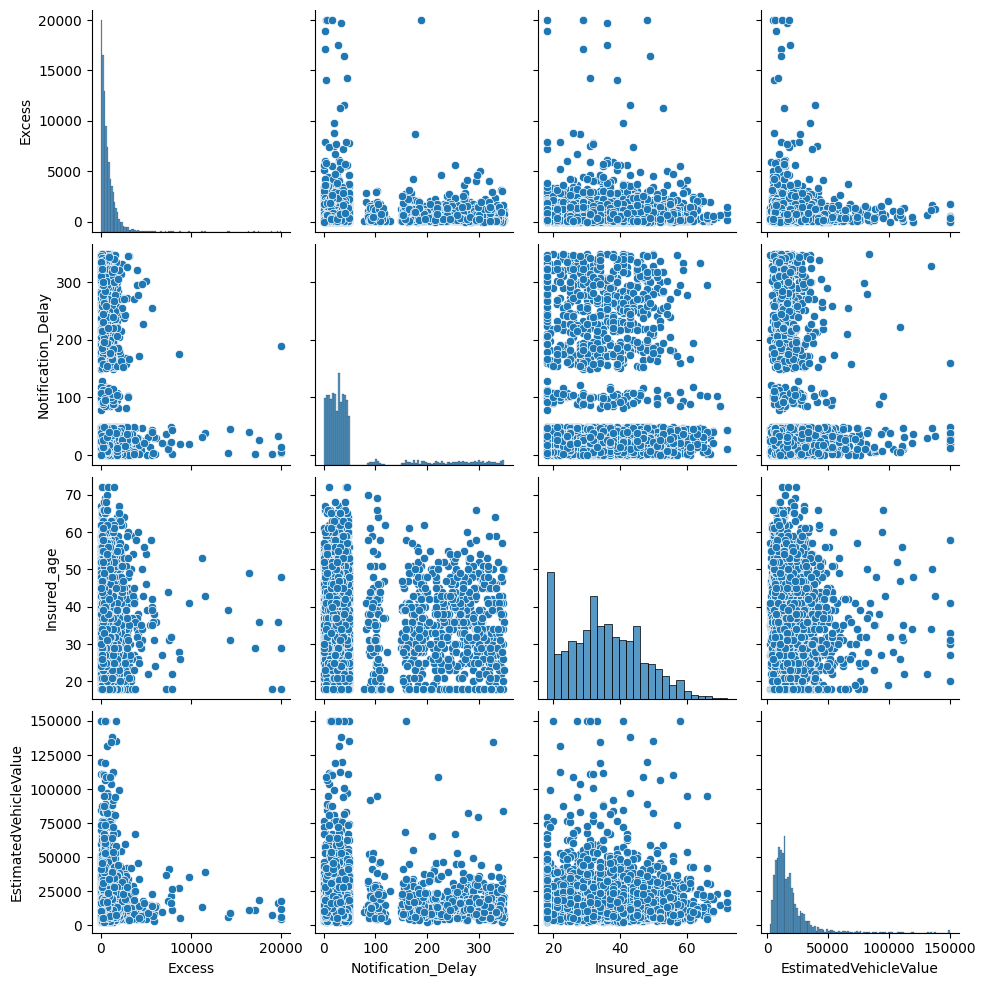

In [22]:
sns.pairplot(df[num_cols[:4]])  
plt.show()


In [23]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


Excess: 195 outliers
Notification_Delay: 670 outliers
Insured_age: 5 outliers
EstimatedVehicleValue: 217 outliers


In [24]:
Q1 = df['Excess'].quantile(0.25)
Q3 = df['Excess'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
df['Excess'] = np.where(df['Excess'] > upper_limit, upper_limit, df['Excess'])


In [25]:
df['Notification_Delay_log'] = np.log1p(df['Notification_Delay'])

In [26]:
df['Insured_age'] = np.clip(df['Insured_age'], 18, 75)

In [27]:
upper_limit = df['EstimatedVehicleValue'].quantile(0.99)
df['EstimatedVehicleValue'] = np.where(df['EstimatedVehicleValue'] > upper_limit,
                                       upper_limit,
                                       df['EstimatedVehicleValue'])

In [28]:
df.describe()

,Excess,Notification_Delay,Injury,ThirdPartyVehicleDamage,InsuredVehicleDamage,Insured_age,EstimatedVehicleValue,Notification_Delay_log
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,705.547996,61.605789,0.453684,0.662895,0.915789,35.016842,17529.759953,3.411433
std,629.379918,86.146009,0.497916,0.472783,0.277740,11.209519,12668.400112,1.226237
min,0.260000,0.000000,0.000000,0.000000,0.000000,18.000000,1944.000000,0.000000
25%,210.690000,15.000000,0.000000,0.000000,1.000000,26.000000,9585.750000,2.772589
50%,499.315000,30.000000,0.000000,1.000000,1.000000,34.000000,14260.000000,3.433987
75%,1035.762500,45.000000,1.000000,1.000000,1.000000,43.000000,21013.750000,3.828641
max,2273.371250,349.000000,1.000000,1.000000,1.000000,72.000000,81700.390000,5.857933


In [29]:
df.isnull().sum()

Claim_Number               0
Excess                     0
Circumstance               0
OrganizationNotifiedBy     0
MethodofNotification       0
NCD_Indicator              0
Notification_Delay         0
Injury                     0
ThirdPartyVehicleDamage    0
InsuredVehicleDamage       0
Insured_age                0
EstimatedVehicleValue      0
Liability_group            0
Notification_Delay_log     0
dtype: int64

In [30]:
df['Age_Group'] = pd.cut(df['Insured_age'],
                         bins=[17, 25, 40, 60, 76],
                         labels=['Young_Adult', 'Adult', 'Middle_Aged', 'Senior'])

df['Notification_Delay_Group'] = pd.cut(df['Notification_Delay'],
                                        bins=[-1, 7, 30, 90, 365],
                                        labels=['Immediate (0-7d)', 'Short (8-30d)', 'Medium (31-90d)', 'Late (>90d)'])

high_excess_threshold = df['Excess'].quantile(0.75)
df['High_Excess_Flag'] = np.where(df['Excess'] > high_excess_threshold, 1, 0)

df['Luxury_Vehicle_Flag'] = np.where(df['EstimatedVehicleValue'] > 100000, 1, 0)

df['High_Impact_Claim'] = np.where((df['Injury'] == 1) | (df['ThirdPartyVehicleDamage'] == 1), 1, 0)

df['NCD_Indicator_Flag'] = df['NCD_Indicator'].map({'Yes': 1, 'No': 0})

print(['Age_Group', 'Notification_Delay_Group', 'High_Excess_Flag',
       'Luxury_Vehicle_Flag', 'High_Impact_Claim', 'NCD_Indicator_Flag'])

['Age_Group', 'Notification_Delay_Group', 'High_Excess_Flag', 'Luxury_Vehicle_Flag', 'High_Impact_Claim', 'NCD_Indicator_Flag']


In [31]:
display(df.head())

,Claim_Number,Excess,Circumstance,OrganizationNotifiedBy,MethodofNotification,NCD_Indicator,Notification_Delay,Injury,ThirdPartyVehicleDamage,InsuredVehicleDamage,Insured_age,EstimatedVehicleValue,Liability_group,Notification_Delay_log,Age_Group,Notification_Delay_Group,High_Excess_Flag,Luxury_Vehicle_Flag,High_Impact_Claim,NCD_Indicator_Flag
0,CLM100491,72.52,Third Party opening door,Employee,Email,No,183.0,0,1,1,42,9542.0,Fully_Liable,5.214936,Middle_Aged,Late (>90d),0,0,1,0
1,CLM101500,713.43,Insured Vehicle changing lanes,Employee,Email,No,271.0,0,1,1,55,13526.0,Split_Liable,5.605802,Middle_Aged,Late (>90d),0,0,1,0
2,CLM100864,62.86,Third Party Hit Insured,TP,Phone,Yes,8.0,0,1,1,26,18943.0,Fully_Liable,2.197225,Adult,Short (8-30d),0,0,1,1
3,CLM101947,920.39,Third Party Vehicle changing lanes,Nameddriver,Phone,No,274.0,0,1,1,32,15570.0,Fully_Liable,5.616771,Adult,Late (>90d),0,0,1,0
4,CLM100138,852.00,Third Party opening door,Broker,Phone,Yes,0.0,0,1,1,39,6489.0,Fully_Liable,0.000000,Adult,Immediate (0-7d),0,0,1,1


In [32]:
if 'Claim_Number' in df.columns:
    df = df.drop(columns=['Claim_Number'])

categ_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Columns: {categ_cols}")

Categorical Columns: ['Circumstance', 'OrganizationNotifiedBy', 'MethodofNotification', 'NCD_Indicator', 'Liability_group', 'Age_Group', 'Notification_Delay_Group']


In [33]:
df_encoded = pd.get_dummies(df, columns=categ_cols, drop_first=True)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 37 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Excess                                             3800 non-null   float64
 1   Notification_Delay                                 3800 non-null   float64
 2   Injury                                             3800 non-null   int64  
 3   ThirdPartyVehicleDamage                            3800 non-null   int64  
 4   InsuredVehicleDamage                               3800 non-null   int64  
 5   Insured_age                                        3800 non-null   int64  
 6   EstimatedVehicleValue                              3800 non-null   float64
 7   Notification_Delay_log                             3800 non-null   float64
 8   High_Excess_Flag                                   3800 non-null   int64  
 9   Luxury_V

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
X = df_encoded.drop(columns=['Claim_Number'], errors='ignore')
y = df['Liability_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
skewed_cols = ['Excess', 'Notification_Delay', 'EstimatedVehicleValue']

for col in skewed_cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
print(f"Data Split: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")

Data Split: 3040 training samples, 760 test samples


In [49]:
print(y_train.value_counts())
print(y_test.value_counts())


Liability_group
Fully_Liable    1660
Split_Liable     774
Not_Liable       606
Name: count, dtype: int64
Liability_group
Fully_Liable    415
Split_Liable    193
Not_Liable      152
Name: count, dtype: int64


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', class_weight='balanced', random_state=42)

lr_model.fit(X_train_scaled, y_train)

y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

print("Logistic Regression Performance\n")

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Logistic Regression Performance

Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

Fully_Liable       1.00      1.00      1.00       415
  Not_Liable       1.00      1.00      1.00       152
Split_Liable       1.00      1.00      1.00       193

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



C:\Users\NANDANA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
rf_model = RandomForestClassifier(
    n_estimators=200,          
    max_depth=None,            
    random_state=42,
    class_weight='balanced'    
)

rf_model.fit(X_train_scaled, y_train)

y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

print("Random Forest Performance\n")

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Random Forest Performance

Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

Fully_Liable       1.00      1.00      1.00       415
  Not_Liable       1.00      1.00      1.00       152
Split_Liable       1.00      1.00      1.00       193

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42, probability=True)

svm_model.fit(X_train_scaled, y_train)

y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

print("SVM Performance\n")

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


SVM Performance

Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

Fully_Liable       1.00      1.00      1.00       415
  Not_Liable       1.00      1.00      1.00       152
Split_Liable       1.00      1.00      1.00       193

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

